In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Copied from https://gist.github.com/grzanka/0485c05a59991c4826d2c2624710e5f0
def read_trc_file(filename, count=-1, only_metadata = False):
    from lecroy import LecroyBinaryWaveform
    data = LecroyBinaryWaveform(inputfilename=filename, file_content=None, count=count)
    y_data = None
    if not only_metadata:
        y_data = data.WAVE_ARRAY_RAW
    metadata_dict = data.metadata
    return y_data, metadata_dict


In [43]:
# Copied from: https://gist.github.com/grzanka/0485c05a59991c4826d2c2624710e5f0
def convert_to_uV(y_data, metadata_dict):
    # if metadata_dict['VERTICAL_GAIN'] != np.float32('6.25e-5'):
    #     return None

    offset_uV = np.int32(np.around(metadata_dict['VERTICAL_OFFSET'] * 1e6))
    gain = np.int32(np.around(metadata_dict['VERTICAL_GAIN'] * 1e6))

    y_data_uV = y_data.astype(np.int32)
    y_data_uV *= gain
    y_data_uV -= offset_uV

    return y_data_uV

In [44]:
file = 'C2Trace00012.trc'
trc_data = read_trc_file(file)
trc_data_converted = convert_to_uV(trc_data[0], trc_data[1])

In [45]:
trc_data_uniq = np.unique(trc_data_converted)
trc_data_sorted = np.sort(trc_data_uniq, kind='quicksort')

In [46]:
diffs = np.diff(trc_data_sorted)
min_diff = np.amin(diffs)

In [47]:
current_bin = trc_data_sorted[0] - min_diff / 2
bins = np.arange(current_bin,trc_data_sorted[-1] + min_diff,min_diff)

In [48]:
plt.hist(trc_data_converted, bins=bins)

(array([  1.33000000e+02,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          5.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          6.00000000e+00,   6.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          6.00000000e+00,   1.00000000e+00,   8.00000000e+00,
          1.10000000e+01,   1.20000000e+01,   2.40000000e+01,
          2.80000000e+01,   5.20000000e+01,   7.70000000e+01,
          1.30000000e+02,   1.99000000e+02,   4.06000000e+02,
          6.41000000e+02,   1.08900000e+03,   2.02200000e+03,
          3.38800000e+03,   5.37100000e+03,   9.51500000e+03,
        

In [49]:
plt.yscale('log', nonposy='clip')

In [50]:
plt.ylabel('Points')
plt.xlabel('Voltage (uV)')

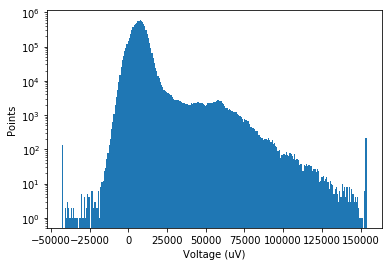

In [51]:
plt.show()